<a href="https://colab.research.google.com/github/WillianMachado95/Classificacao_IRIS/blob/main/ModClassificacao_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizagem Supervisionada

**Algoritmos para problemas de classificação**

Problemas de classificação são aqueles em que buscamos um resultado dentro
de classe ou categoria, por exemplo: se estamos tentando classificar uma imagem
como cavalo ou humano, possuímos apenas duas classes possíveis. Os algoritmos
utilizados são: **KNN, SVM, árvore de decisão, regressão logística, entre outros**.

**k-Nearest Neighbors**

O KNN (K vizinhos mais próximos) é considerado um dos algoritmos mais
simples dentro da categoria de aprendizagem supervisionada, sendo muito utilizado
para problemas de classificação.

**Problemas de classificação:** Vale lembrar que em problemas de classificação não estamos interessados em valores exatos, queremos apenas saber se um dado pertence ou não a uma dada classe.

**O método:** Para realizar a classificação, o KNN calcula a distância do objeto desconhecido
(target) para todos os outros elementos, encontra os K vizinhos mais próximos, faz uma contagem dos rótulos e considera que o objeto desconhecido pertence ao rótulo
de maior contagem.

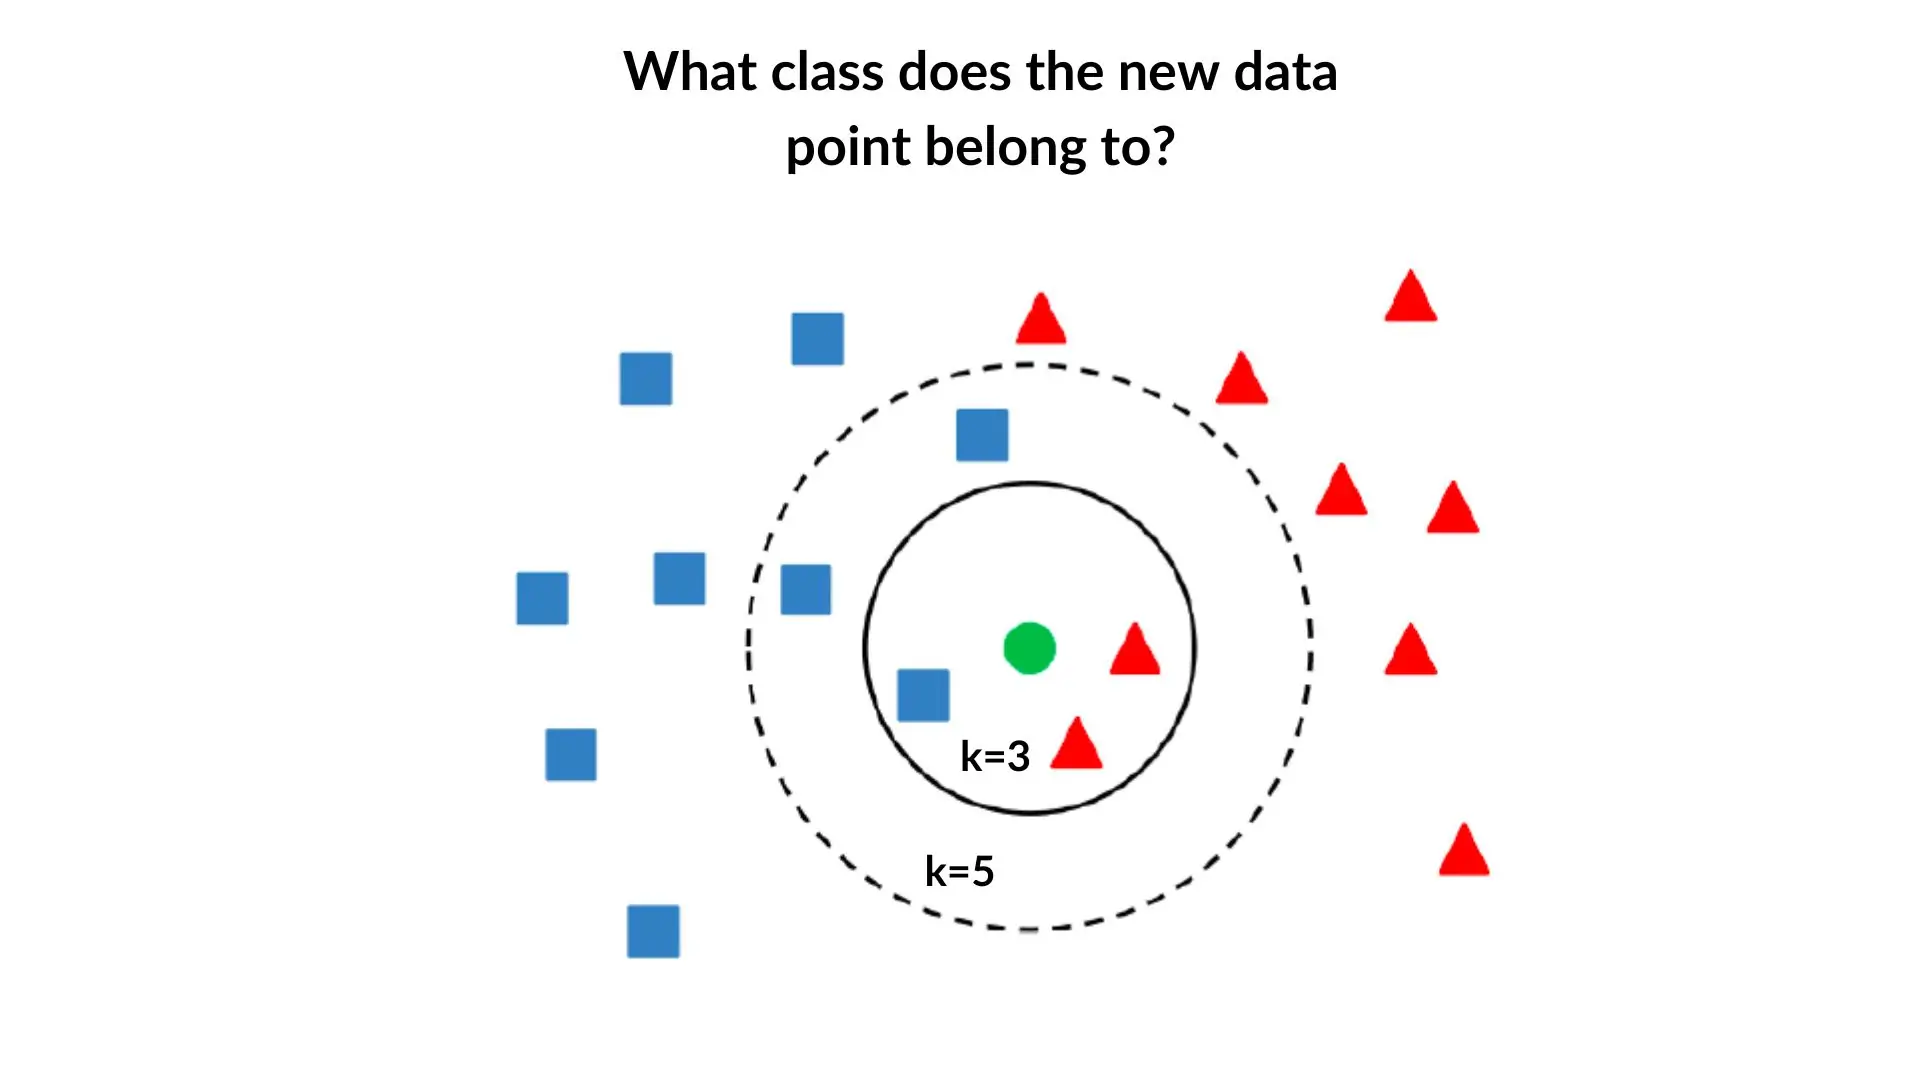


# Qual é a espécie da flor?

https://archive.ics.uci.edu/dataset/53/iris

Vamos desenvolver um problema da Machine Learning capaz de classificar a espécie da flor (setosa, versicolor, virginica) com base nas dimensões da pétala.

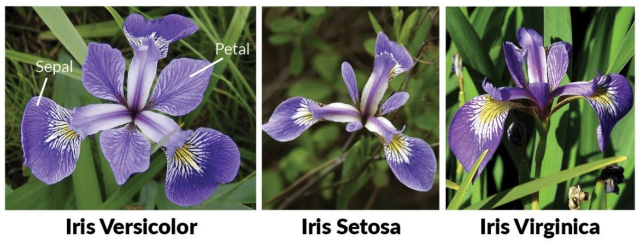

In [ ]:
# Inicializção das bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Caminho do arquivo
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"

In [ ]:
# Lê e carrega o arquivo para a memória
df = pd.read_csv(url)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Verificar a distribuição das classes
df["species"].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


<function matplotlib.pyplot.show(close=None, block=None)>

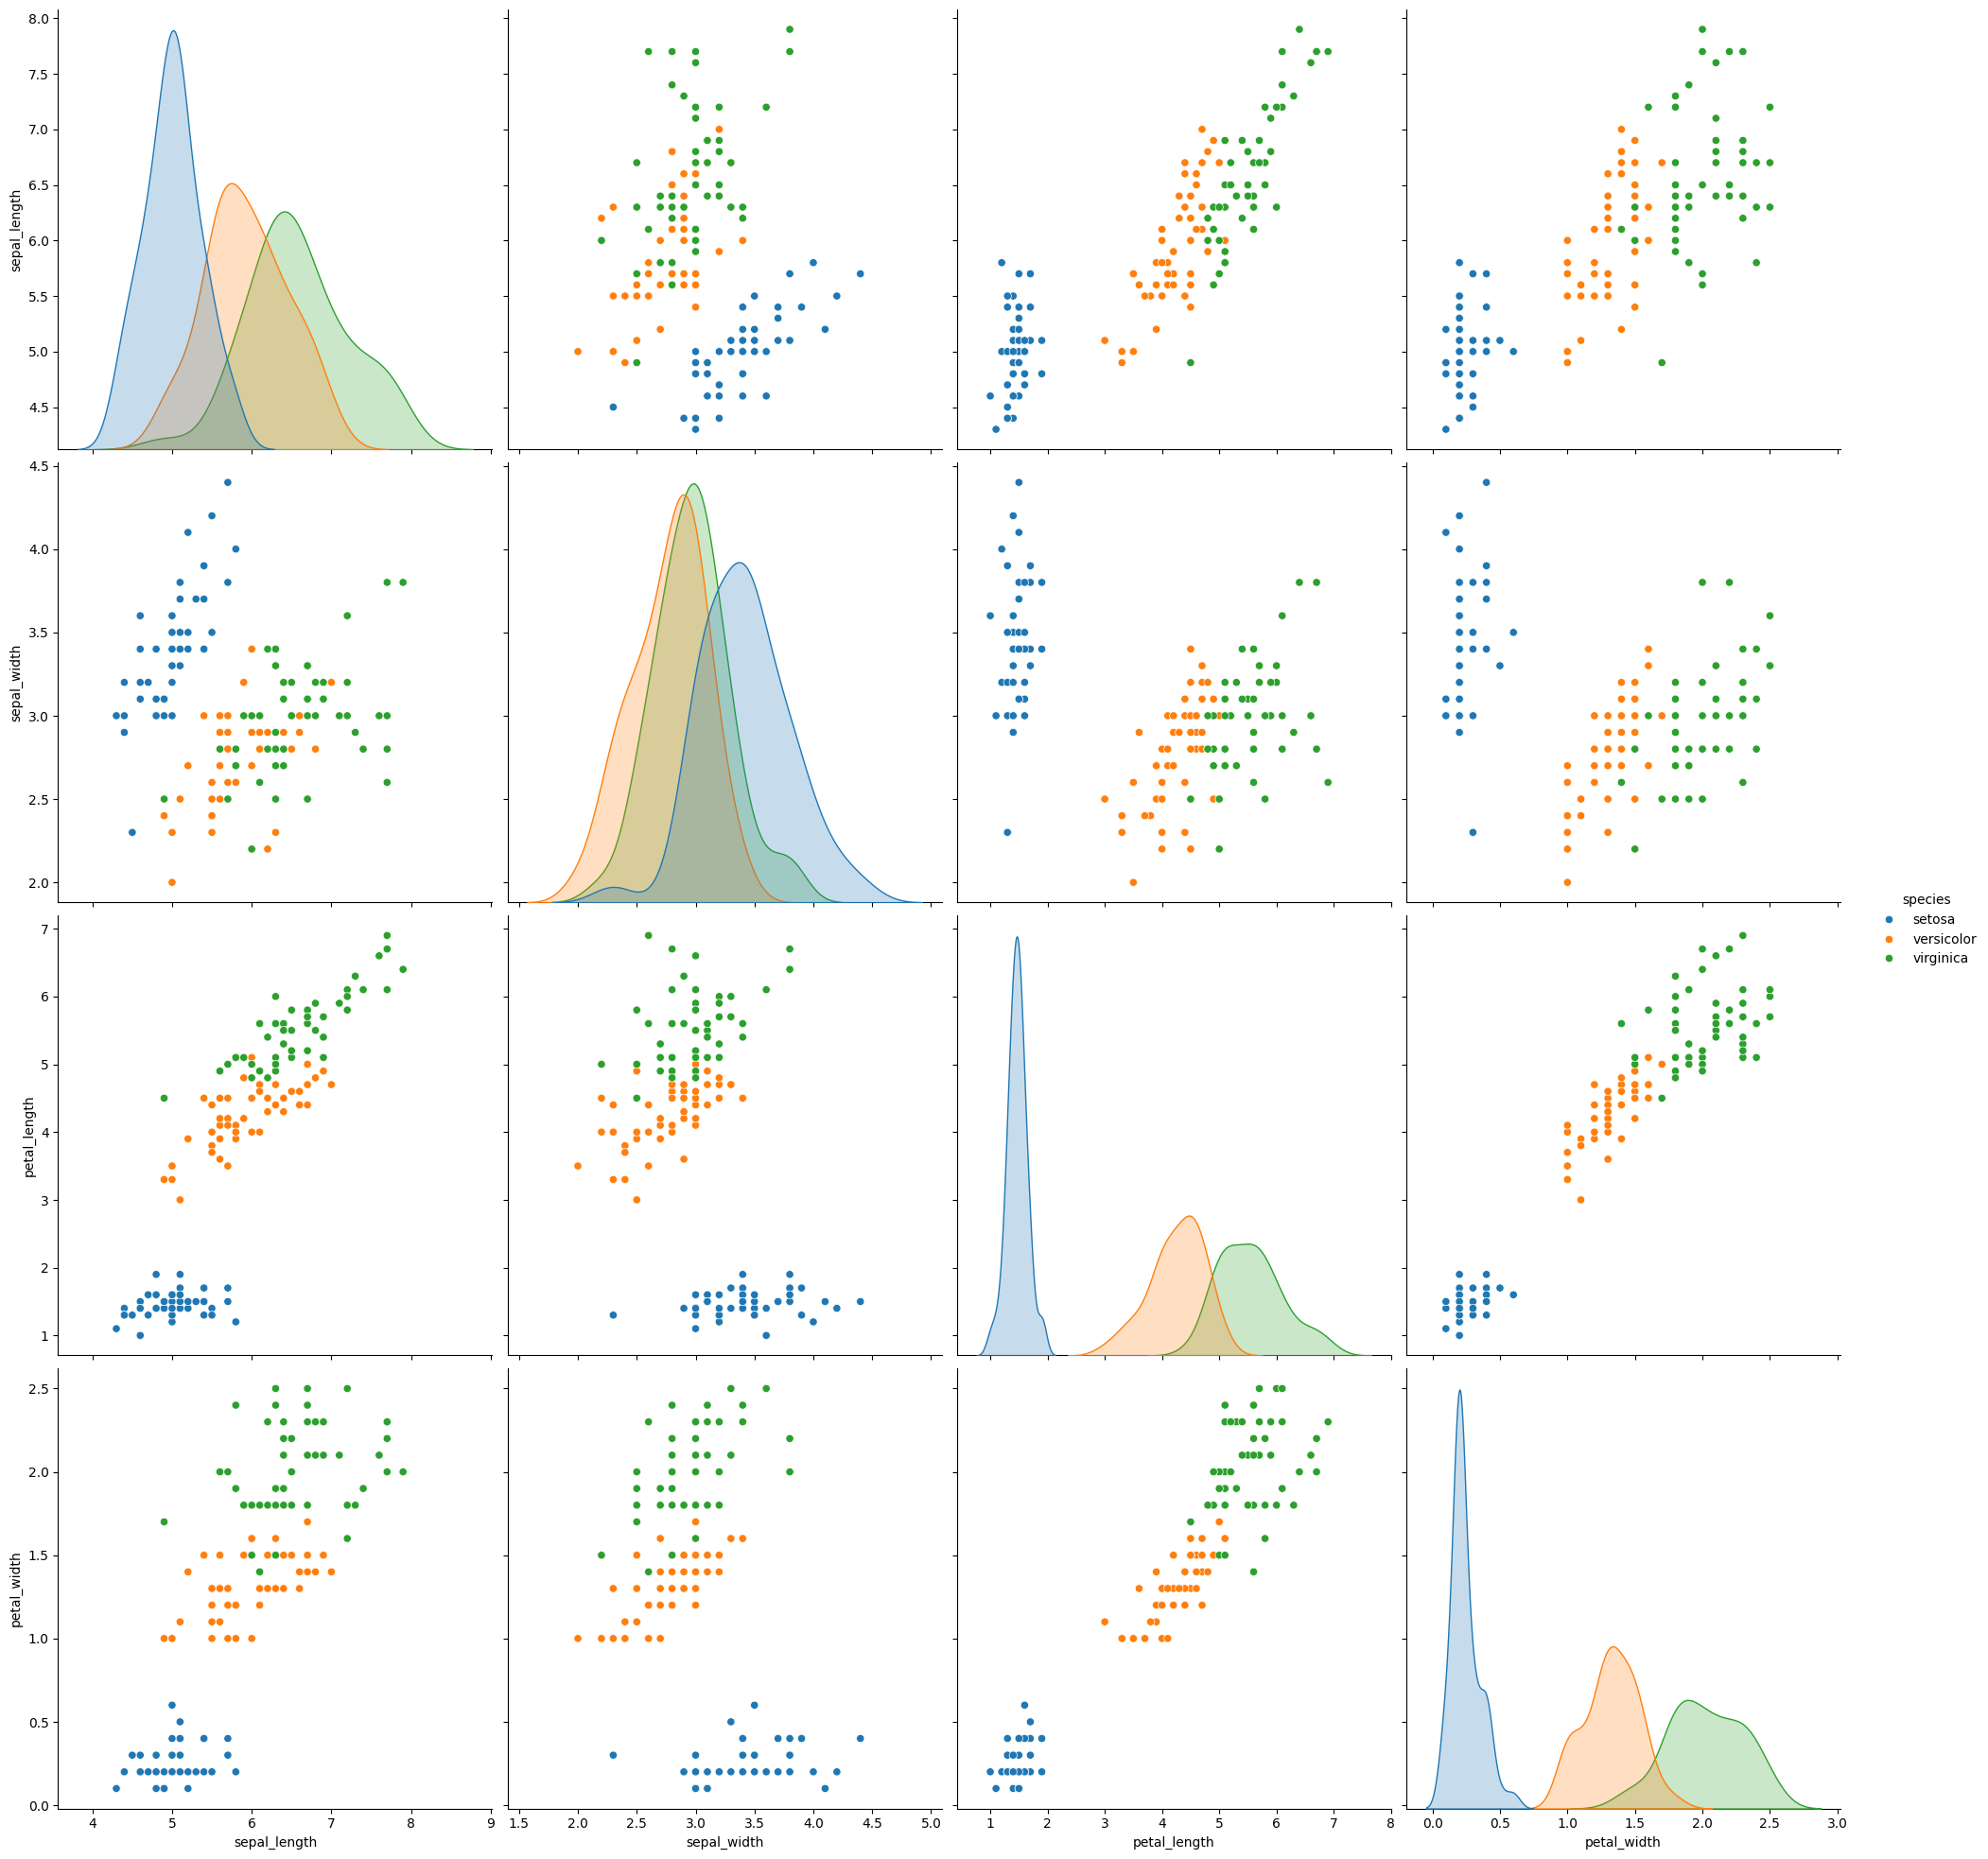

In [ ]:

#Este é o local onde você pode visualizar se as features são correlacionadas ou se formam clusters distintos.
# matriz de gráficos que visualiza as relações entre todas as combinações de variáveis numéricas no seu DataFrame

# a cor vem do campo 'species' do dataframe
sns.pairplot(df, hue='species', height = 5)
plt.show

In [ ]:
# Selecionando um sub-dataframe
#com os campos petal_length e petal_width,
# e outro com a variável de classes

entradas = df[['petal_length', 'petal_width']] # atributos
classes = df['species'] #target

**Dividindo os dados em conjunto de treino e de teste**

Neste caso vamos trabalhar com a seguinte proporção:

Treinamento - 80% das amostras

Teste - 20% das amostras

In [ ]:
# Separamos 20% para o teste

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")


Formato das tabelas de dados de treino (120, 2) e teste (30, 2)


In [ ]:
# primeiras linhas do DataFrame... Note que ela é Randomica

entradas_treino.head()

,petal_length,petal_width
44,1.9,0.4
87,4.4,1.3
116,5.5,1.8
28,1.4,0.2
111,5.3,1.9


**Chegou a hora de aplicar o modelo de classificação**

Treinar um modelo é simples se usar o Scikit-Learn. Basta criar o classificador e chamar o método fit().

O método fit(x,y) recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array contendo as saidas esperadas do classificador, seja na forma de textos ou de inteiros

In [ ]:
# Cria o classificar KNN
k = 3
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning (O método fit vai trinar o modelo)
modelo.fit(entradas_treino, classes_treino)


KNeighborsClassifier(n_neighbors=3)

**Testar o modelo**

O método predict(x) recebe uma matriz ou dataframe X onde cada linha é uma amostra de TESTE, retornando um array de classes.

In [ ]:
# para obter as previsões, basta chamar o método predict()

classes_encontradas = modelo.predict(entradas_teste)
print(f"Predições: {classes_encontradas}")

Predições: ['versicolor' 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa' 'virginica' 'virginica' 'virginica' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'setosa' 'virginica']


**Verificando os acertos**

**Acurácia e Precisão** são métricas cruciais de Avaliação de Modelos.

Eles ajudam a responder a pergunta: **"O quão bom é o meu modelo de classificação?"**


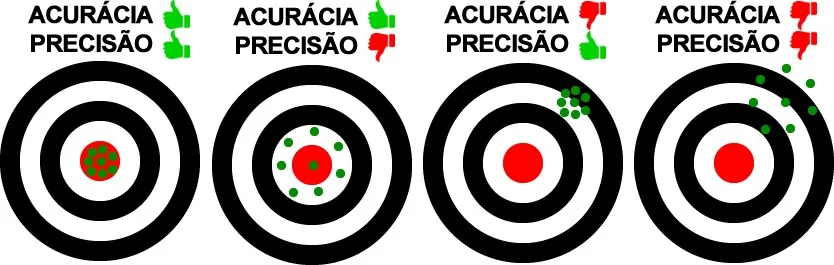

**Acurácia**

Representa o quão perto, em média, os seus acertos estão do centro (o valor real/verdadeiro). É a medida da correção geral do seu modelo. É a proporção de classificações que o modelo acertou (tanto positivos quanto negativos) em relação ao total de amostras.

$$\text{Acurácia} = \frac{\text{Acertos Totais}}{\text{Total de Amostras}}$$

Exemplo: Se o modelo Iris acerta 90 das 100 amostras totais, a Acurácia é de 90%.

In [ ]:
# Para determinar a quantidade de acertos (acuracia)
from sklearn.metrics import accuracy_score

acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)

Acerto médio de classificação:  0.9


**Precisão**

 Representa o quão agrupados e consistentes os seus acertos estão, independentemente de estarem no centro.É a métrica que mede a qualidade das predições positivas do seu modelo. Ela responde à pergunta: "De todas as vezes que o modelo previu uma classe X (ex: Iris Virginica), quantas vezes ele estava realmente certo?"

 $$\text{Precisão} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Positivos}}$$

 Exemplo: Se o modelo previu 12 vezes que era Iris Virginica e acertou 10, a Precisão para a classe Virginica é de $10/12 \approx 83.3\%$.

In [ ]:
from sklearn.metrics import precision_score

# Calcula a precisão ponderada para o problema multi-classe
precision_ponderada = precision_score(classes_teste, classes_encontradas, average='weighted')
print(f"Precisão Ponderada (Geral): {precision_ponderada:.4f}")

Precisão Ponderada (Geral): 0.9014


A Matriz de Confusão é uma tabela que resume o desempenho de um algoritmo de classificação, mostrando os acertos e erros do modelo em comparação com os rótulos verdadeiros.

In [ ]:
# Calculo da Matriz de confusão

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(classes_teste, classes_encontradas)
print(cm)

[[10  0  0]
 [ 0 10  1]
 [ 0  2  7]]


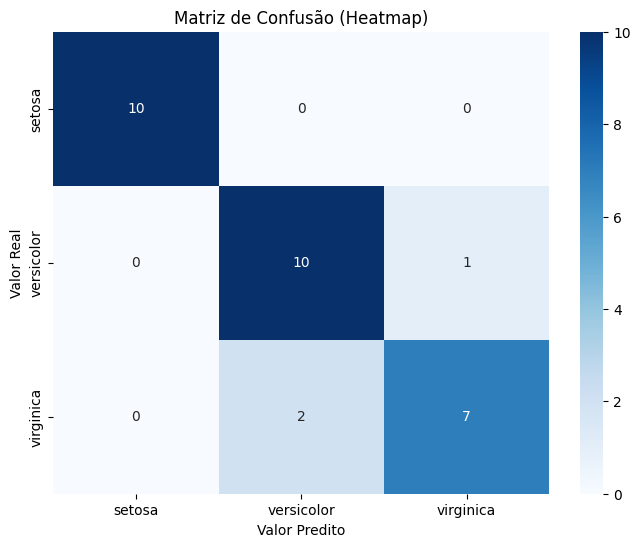

In [ ]:
labels = sorted(df['species'].unique().tolist())

# 3. Geração do Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,               # Mostrar os números dentro das células
    fmt="d",                  # Formato: inteiro decimal
    cmap="Blues",             # Paleta de cores (outras boas: "YlGnBu", "viridis")
    xticklabels=labels,       # Rótulos das colunas (Predito)
    yticklabels=labels        # Rótulos das linhas (Real)
)

# Configuração e exibição do gráfico
plt.title("Matriz de Confusão (Heatmap)")
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.show()